In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/qk/0_srvgns7zscwh127pk191h00000gn/T/pip-req-build-2zb2s1us
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /private/var/folders/qk/0_srvgns7zscwh127pk191h00000gn/T/pip-req-build-2zb2s1us
  Resolved https://github.com/tensorflow/docs to commit d09c37be055698bf6d08aff1c79d5d44492d9f52
  Preparing metadata (setup.py) ... done


In [2]:
!pip install keract

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

'2.9.1'

In [5]:
from keract import get_activations
from keract import display_activations

In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Fashion MNIST using CNN 

We see how we can construct a simple CNN model to see how it performs on our fashion mnist dataset 

## CNNs
https://en.wikipedia.org/wiki/Kernel_(image_processing)

1. Take matrices (or kernels) and pass it over an image. 
2. Passing over the image means we are doing something like a convolutional operation.
3. This way we change underlying pixels using this matrix. 
4. We obtain multiple activation maps(or feature maps), one for each kernel, each holding some specific feature for that image.
5. We can do stuff like edge detection where you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

## Load dataset 

In [7]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28, 1)

## Define the model 

Conv->MaxPooling->Conv->MaxPooling->Flatten


### Conv layer

```
Args:
  filters: Integer, the dimensionality of the output space (i.e. the number of
    output filters in the convolution).
  kernel_size: An integer or tuple/list of 2 integers, specifying the height
    and width of the 2D convolution window. Can be a single integer to specify
    the same value for all spatial dimensions.
  strides: An integer or tuple/list of 2 integers, specifying the strides of
    the convolution along the height and width. Can be a single integer to
    specify the same value for all spatial dimensions. Specifying any stride
    value != 1 is incompatible with specifying any `dilation_rate` value != 1.
  padding: one of `"valid"` or `"same"` (case-insensitive).
    `"valid"` means no padding. `"same"` results in padding with zeros evenly
    to the left/right or up/down of the input. When `padding="same"` and
    `strides=1`, the output has the same size as the input.
```

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name='conv_1'), #28 height 28 width 1 channel
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', name='conv_2'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', name='conv_3'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_2')
])

2022-12-06 11:03:31.883780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

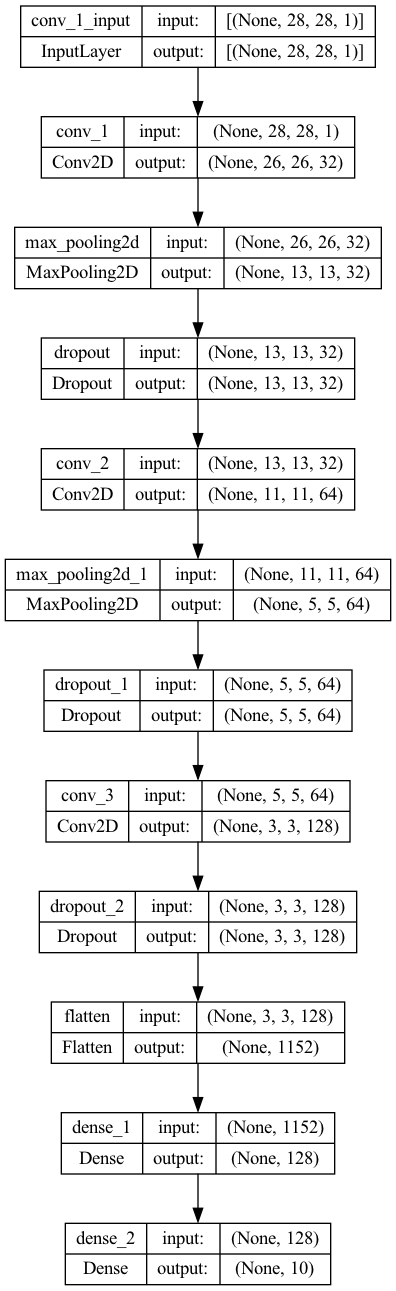

In [11]:
plot_model(model, show_shapes=True)

In [12]:
%%time

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)

history = model.fit(train_images, train_labels, epochs=100, batch_size=1000,
                    callbacks=[earlystopping],
                    shuffle=True, validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 19s 392ms/step - loss: 1.1647 - accuracy: 0.5732 - val_loss: 0.6744 - val_accuracy: 0.7532
Epoch 2/100
48/48 [==============================] - 17s 363ms/step - loss: 0.6466 - accuracy: 0.7539 - val_loss: 0.5542 - val_accuracy: 0.7885
Epoch 3/100
48/48 [==============================] - 18s 369ms/step - loss: 0.5533 - accuracy: 0.7909 - val_loss: 0.4789 - val_accuracy: 0.8272
Epoch 4/100
48/48 [==============================] - 17s 360ms/step - loss: 0.5017 - accuracy: 0.8145 - val_loss: 0.4383 - val_accuracy: 0.8431
Epoch 5/100
48/48 [==============================] - 17s 353ms/step - loss: 0.4622 - accuracy: 0.8299 - val_loss: 0.4010 - val_accuracy: 0.8586
Epoch 6/100
48/48 [==============================] - 16s 332ms/step - loss: 0.4307 - accuracy: 0.8425 - val_loss: 0.3810 - val_accuracy: 0.8633
Epoch 7/100
48/48 [==============================] - 15s 323ms/step - loss: 0.4053 - accuracy: 0.8514 - val_loss: 0.3587 - val_accuracy:

In [13]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2235 - accuracy: 0.9182

Test accuracy:  0.9182000160217285


## Visualizing activation maps

### Keract : Activations + Gradients

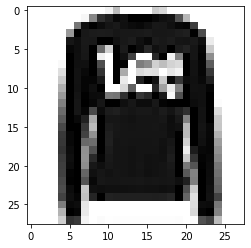

In [14]:
plt.imshow(test_images[1][:,:,0], plt.cm.binary)

In [15]:
activations = get_activations(model, train_images[1:2, :, :, :])

In [16]:
activations.keys()

odict_keys(['conv_1_input', 'conv_1', 'max_pooling2d', 'dropout', 'conv_2', 'max_pooling2d_1', 'dropout_1', 'conv_3', 'dropout_2', 'flatten', 'dense_1', 'dense_2'])

In [17]:
activations_filtered = {k:v for k,v in activations.items() 
                        if k in ['conv_1', 'conv_2', 'conv_3', 'dense_1', 'dense_2']}

conv_1 (1, 26, 26, 32) 


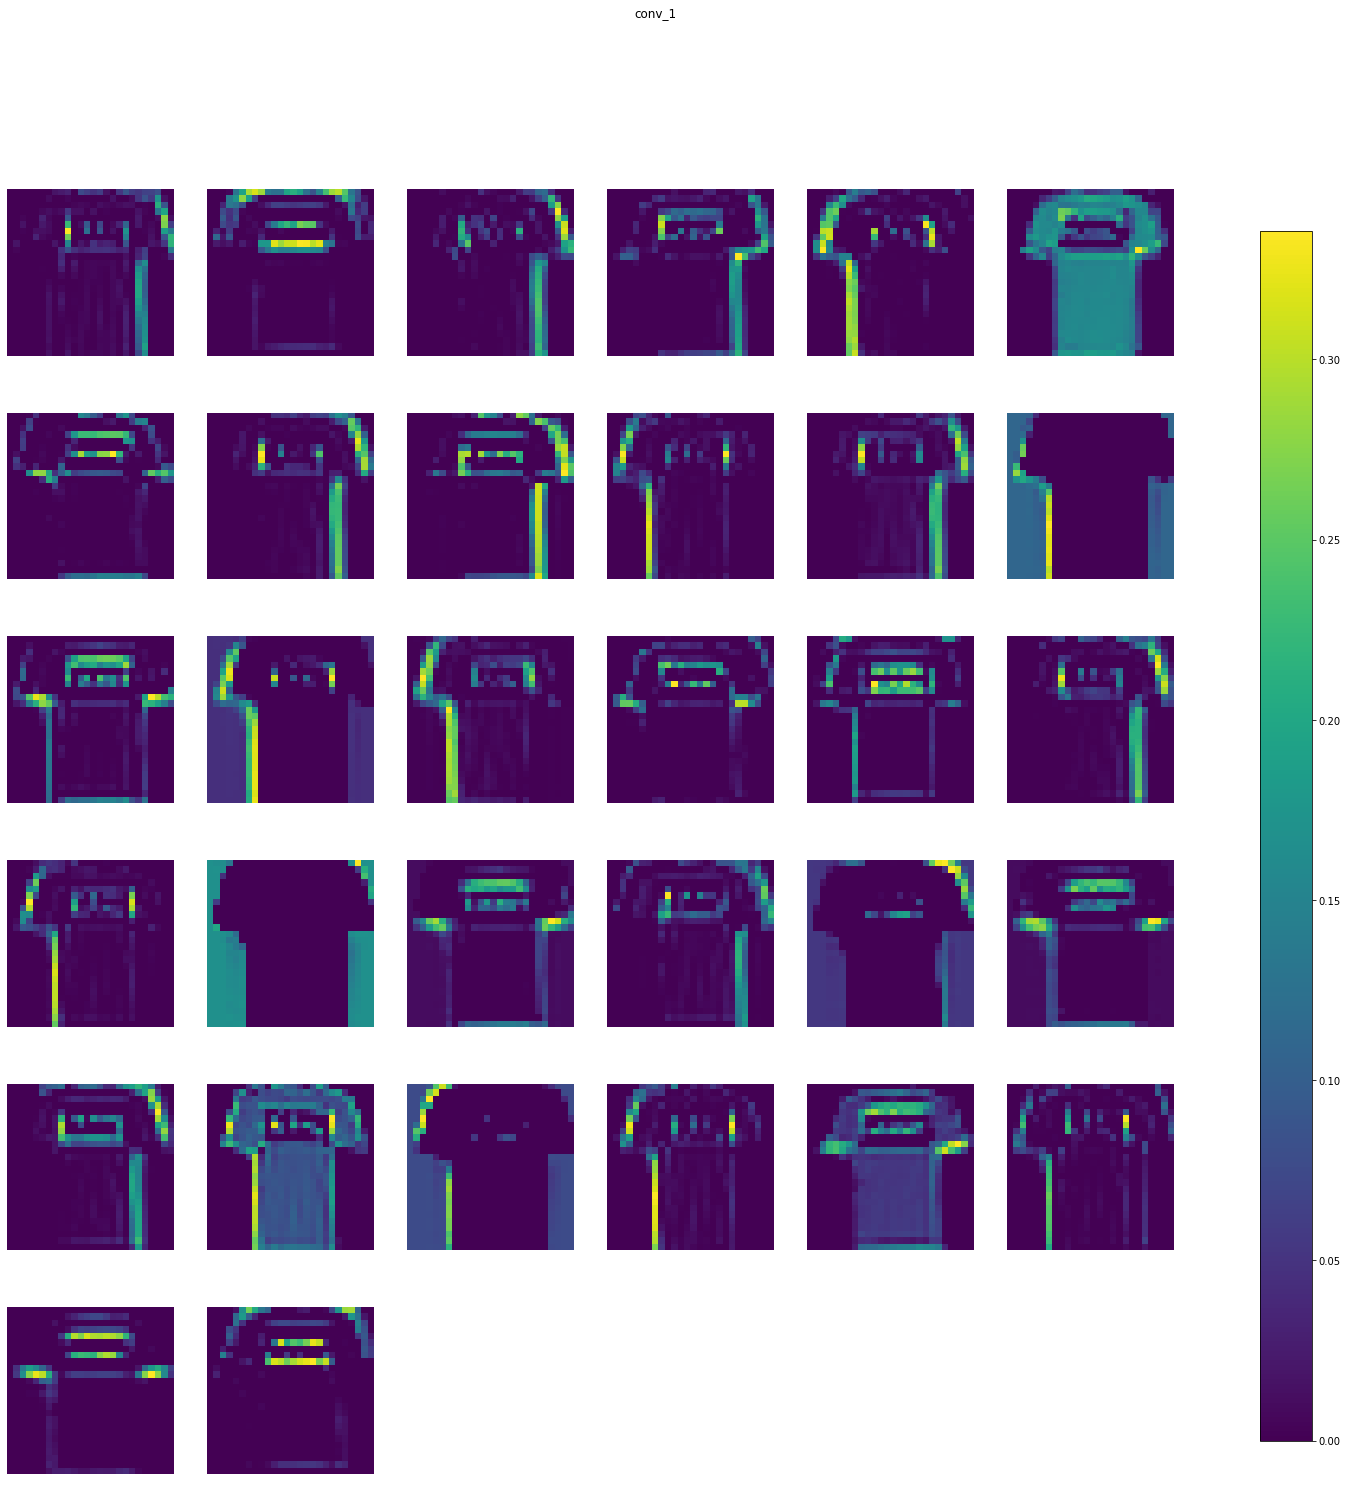

conv_2 (1, 11, 11, 64) 


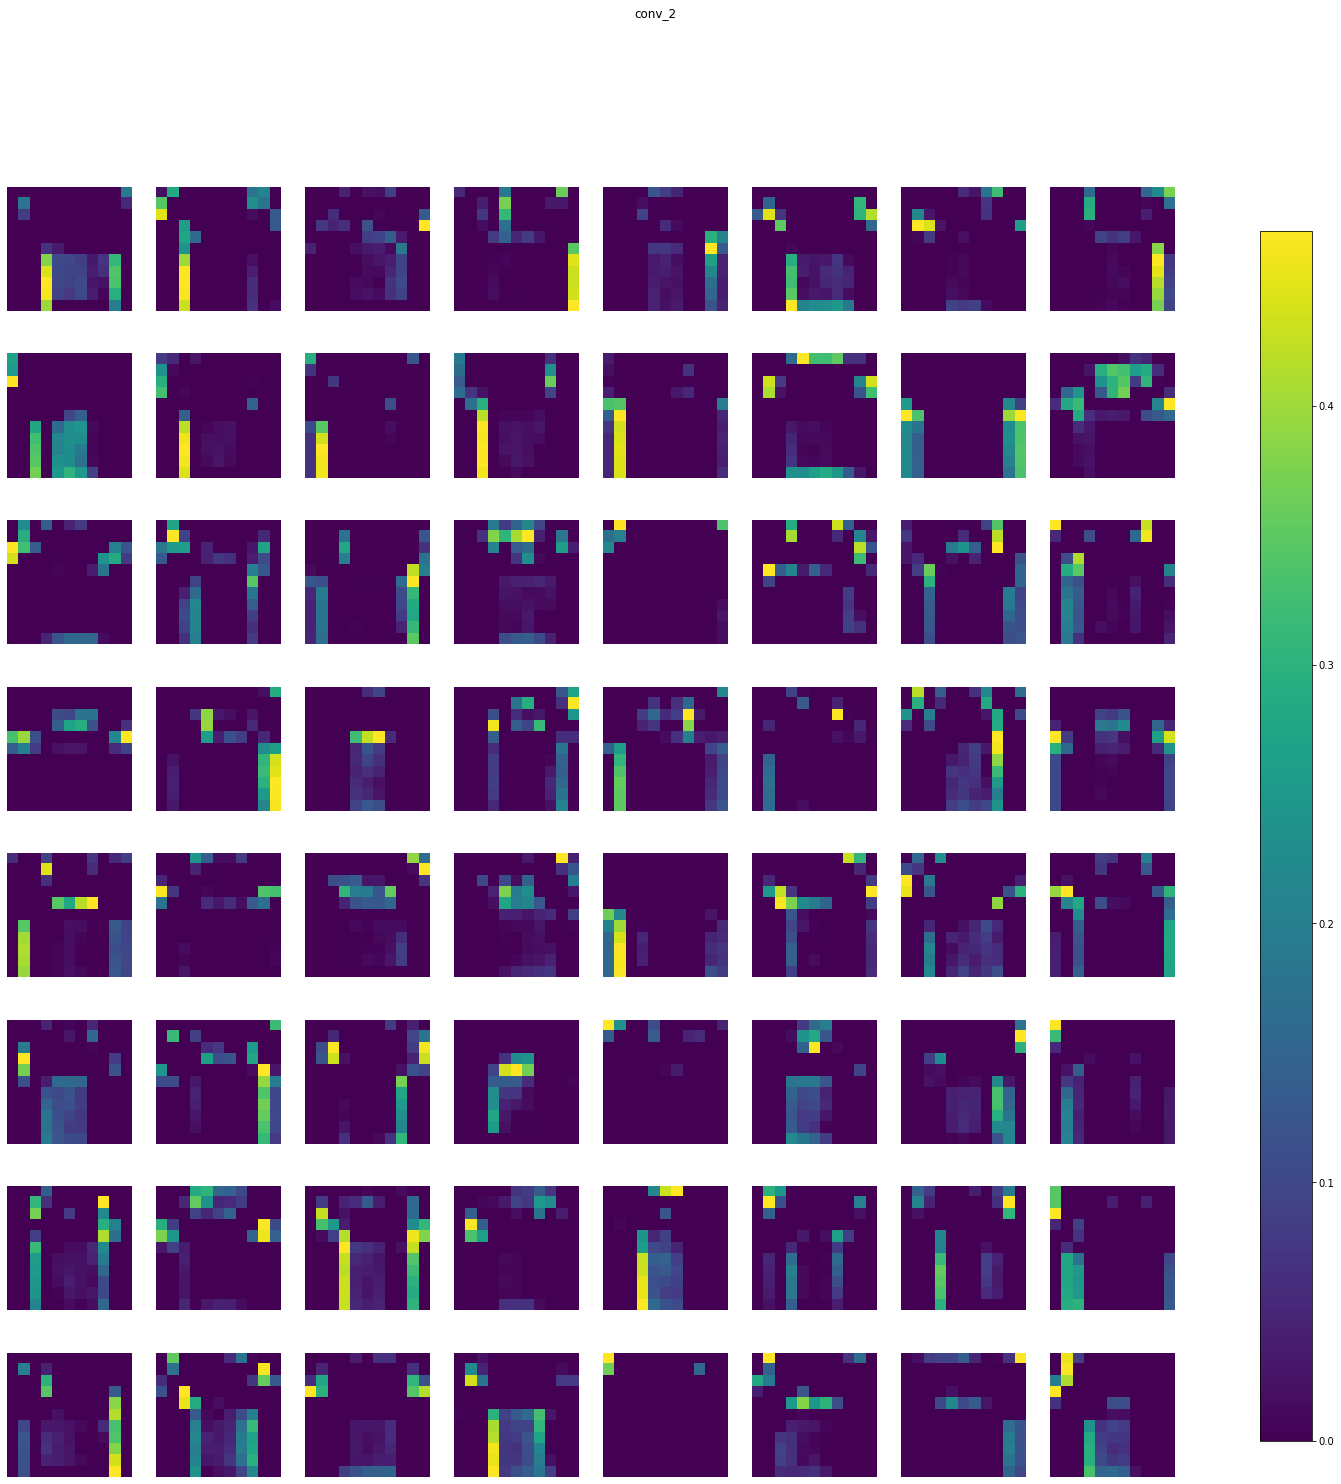

conv_3 (1, 3, 3, 128) 


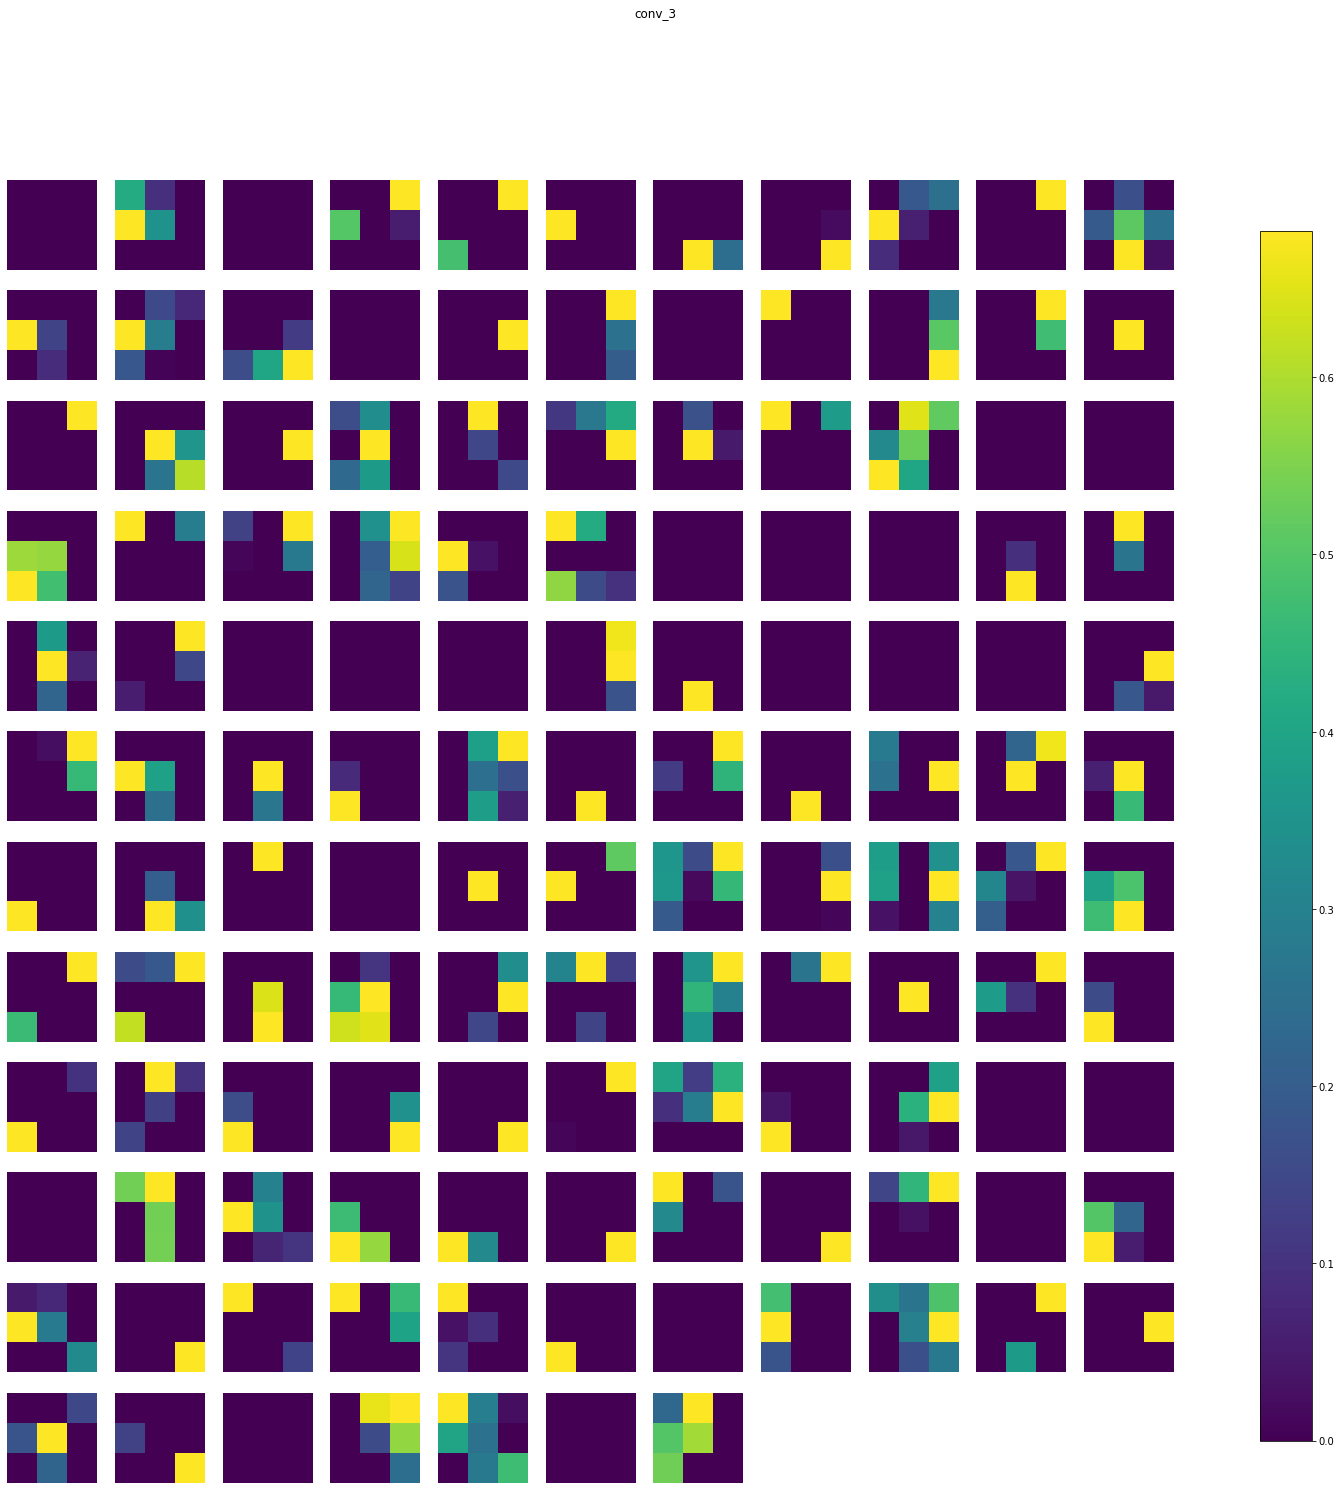

dense_1 (1, 128) 


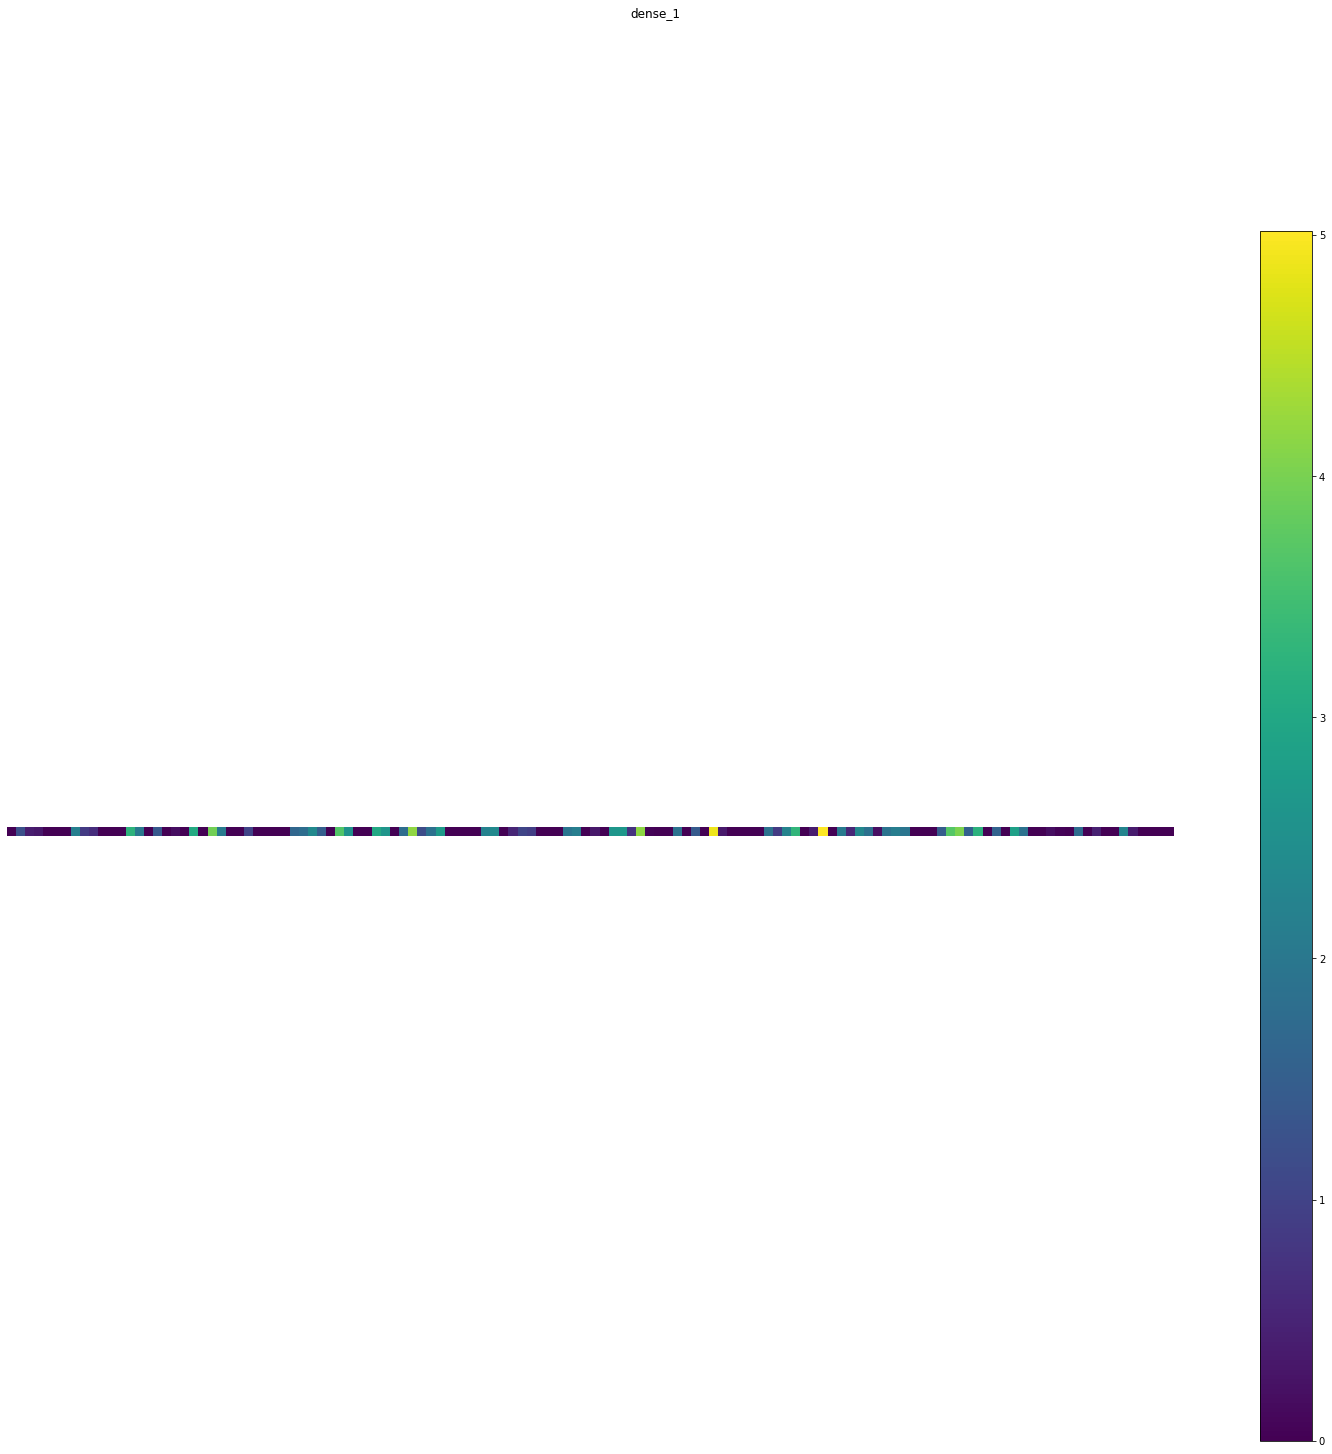

dense_2 (1, 10) 


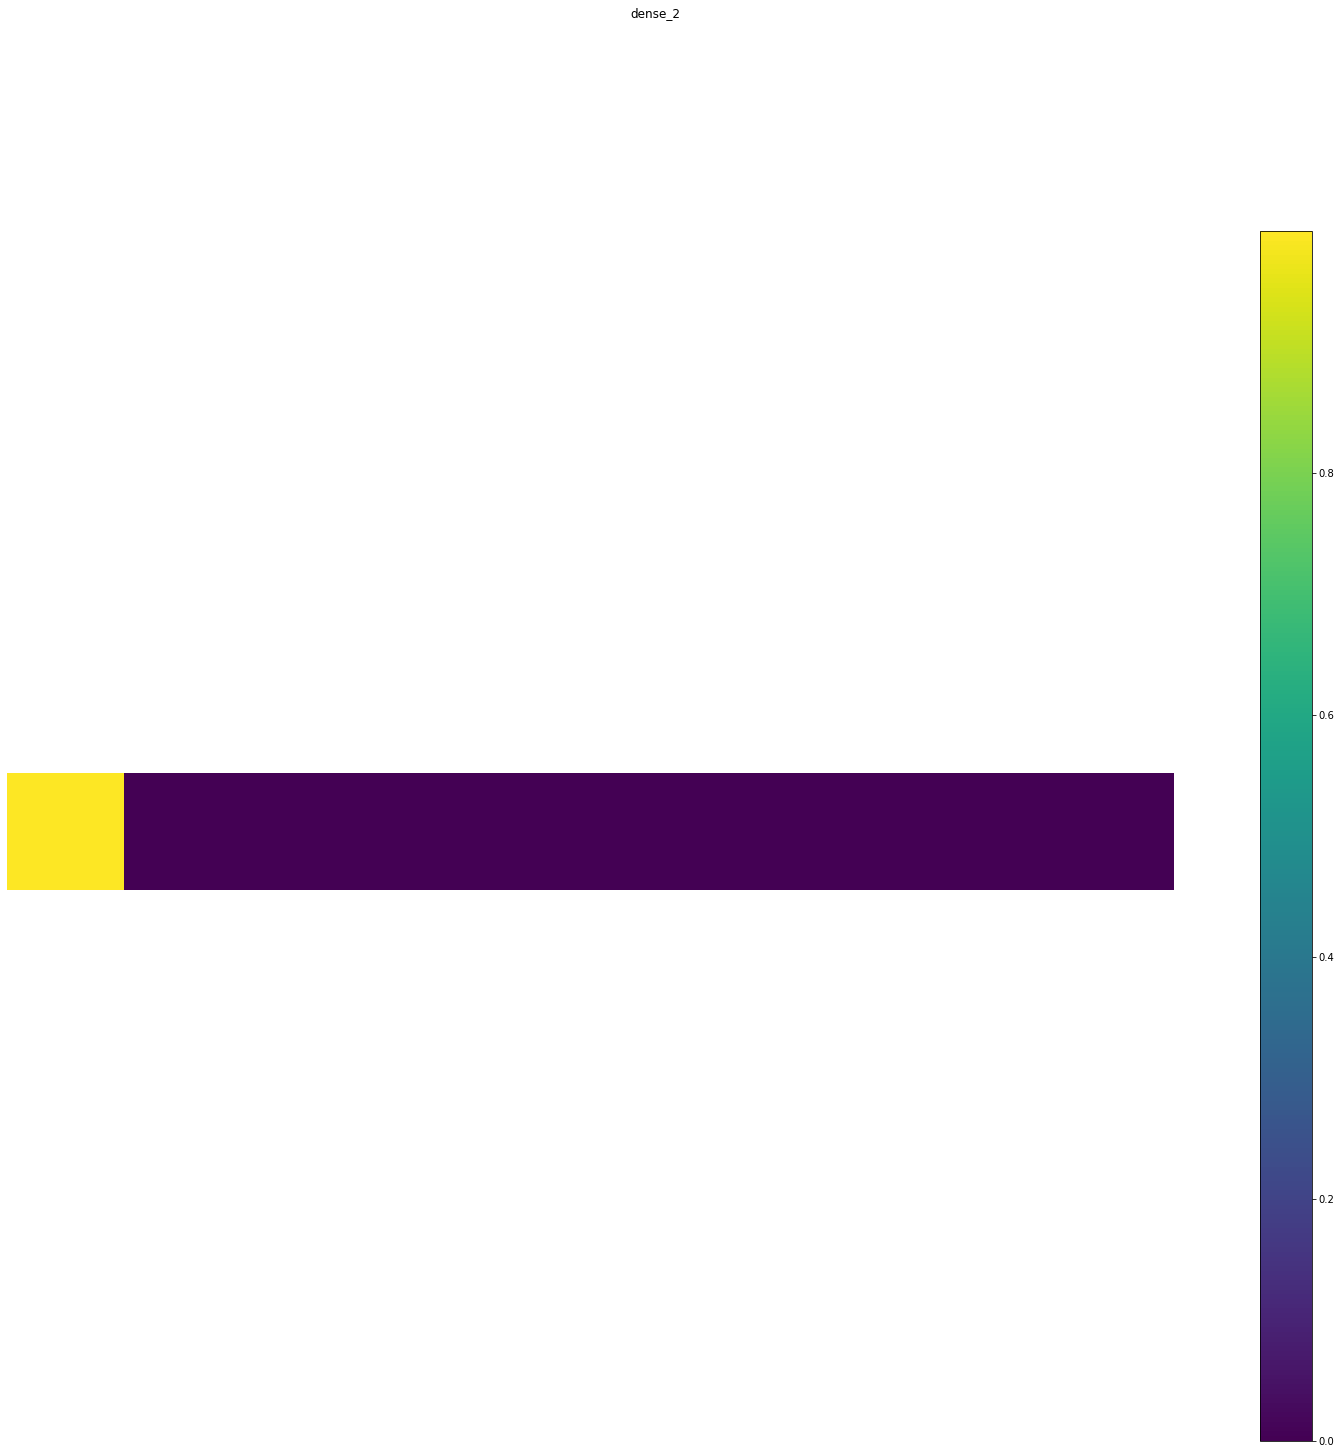

In [18]:
display_activations(activations_filtered)

conv_1 (1, 26, 26, 32) 


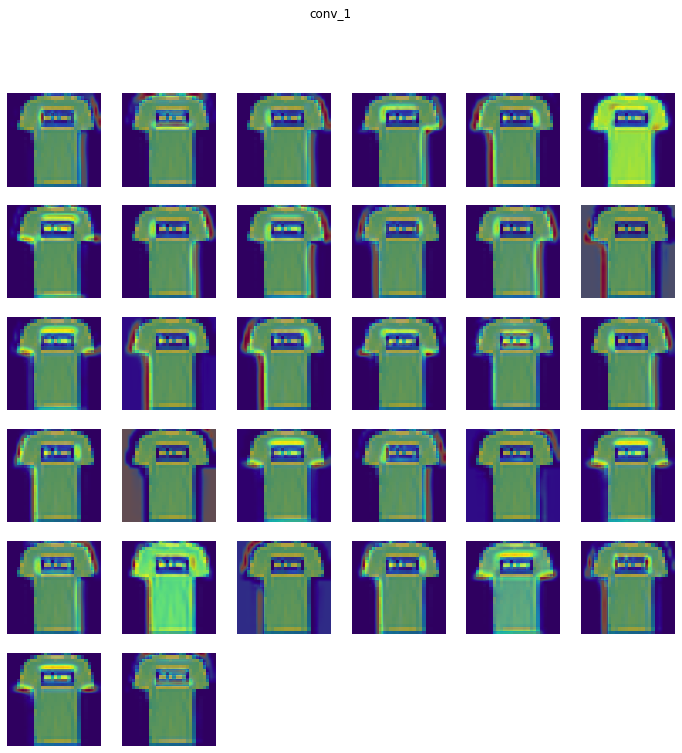

conv_2 (1, 11, 11, 64) 


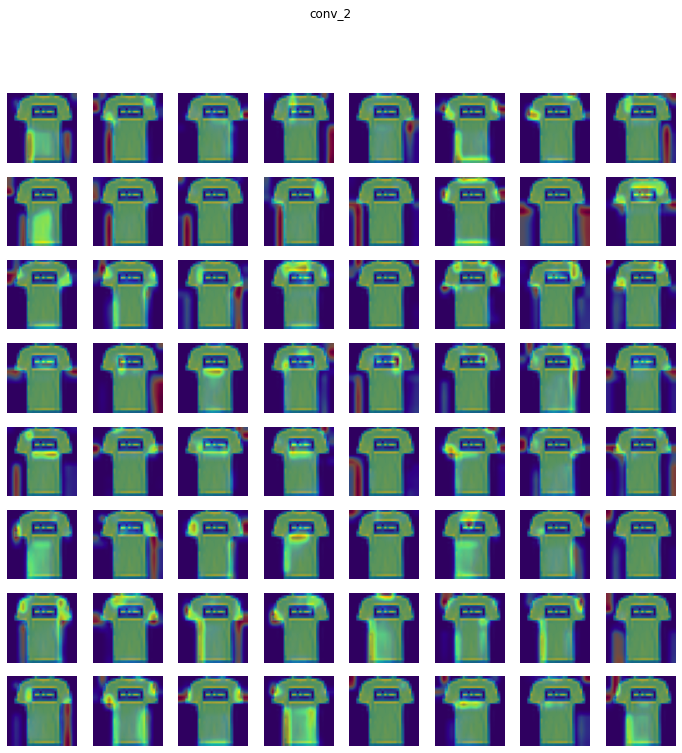

conv_3 (1, 3, 3, 128) 


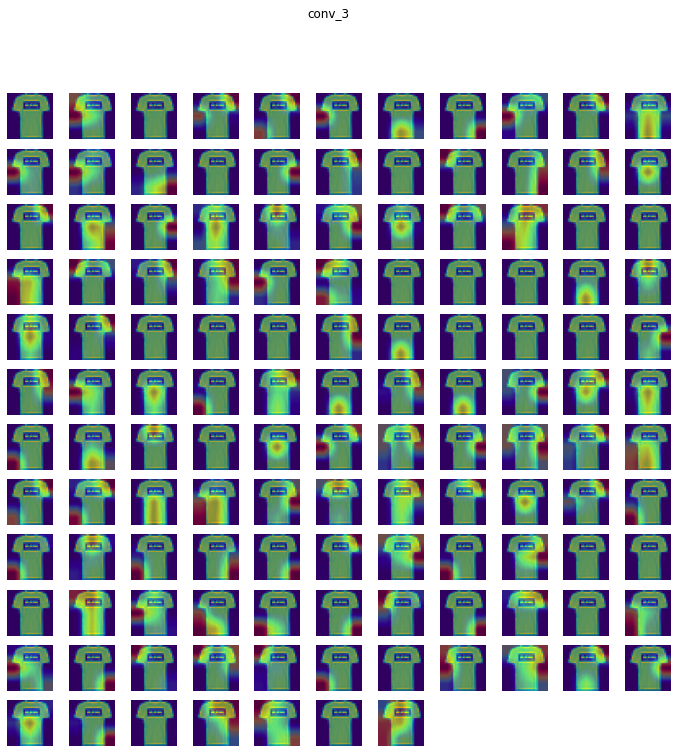

dense_1 (1, 128) -> Skipped. 2D Activations.
dense_2 (1, 10) -> Skipped. 2D Activations.


In [19]:
from keract import display_heatmaps
display_heatmaps(activations_filtered, train_images[1:2, :, :, :])

## CNNs + Batch Normalization 

### Batch Norm after activation layer

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name='conv_1'), #28 height 28 width 1 channel
  tf.keras.layers.BatchNormalization(axis=-1), #axis=-1 use -1 if channels are the last dim in input shape
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', name='conv_2'),
  tf.keras.layers.BatchNormalization(axis=-1), #axis=-1 use -1 if channels are the last dim in input shape
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', name='conv_3'),
  tf.keras.layers.BatchNormalization(axis=-1), #axis=-1 use -1 if channels are the last dim in input shape
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_2')
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)      

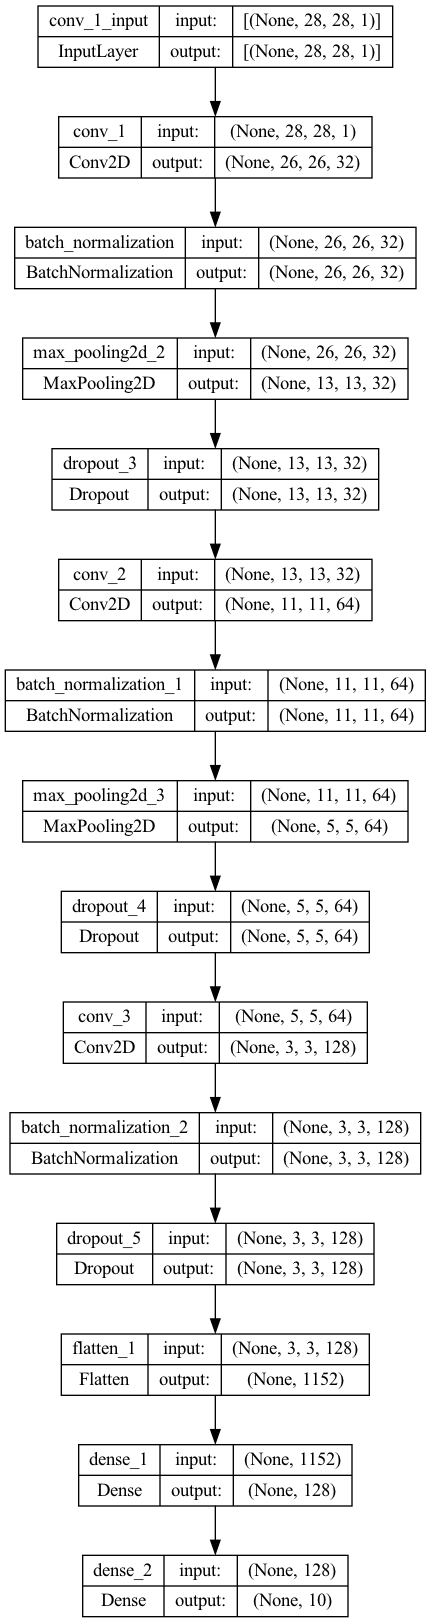

In [22]:
plot_model(model, show_shapes=True)

In [23]:
%%time

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)

history = model.fit(train_images, train_labels, epochs=100, batch_size=1000,
                    callbacks=[earlystopping],
                    shuffle=True, validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 26s 519ms/step - loss: 0.8060 - accuracy: 0.7188 - val_loss: 2.4750 - val_accuracy: 0.0978
Epoch 2/100
48/48 [==============================] - 26s 541ms/step - loss: 0.4772 - accuracy: 0.8239 - val_loss: 2.9530 - val_accuracy: 0.1944
Epoch 3/100
48/48 [==============================] - 25s 528ms/step - loss: 0.4126 - accuracy: 0.8480 - val_loss: 2.9515 - val_accuracy: 0.1555
Epoch 4/100
48/48 [==============================] - 25s 532ms/step - loss: 0.3705 - accuracy: 0.8646 - val_loss: 2.4866 - val_accuracy: 0.3837
Epoch 5/100
48/48 [==============================] - 25s 529ms/step - loss: 0.3493 - accuracy: 0.8719 - val_loss: 2.3909 - val_accuracy: 0.3964
Epoch 6/100
48/48 [==============================] - 26s 533ms/step - loss: 0.3253 - accuracy: 0.8793 - val_loss: 1.9182 - val_accuracy: 0.5473
Epoch 7/100
48/48 [==============================] - 29s 613ms/step - loss: 0.3101 - accuracy: 0.8850 - val_loss: 1.4755 - val_accuracy:

In [24]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.2527 - accuracy: 0.9092

Test accuracy:  0.9092000126838684
